# Using Linear Regression by scikit learn library

In this notebook we use sklearn library to run a linear regression on the Jupyter instance. Please note that we do not use Amazom SageMaker training APIs in this notebook, everything happens inside this Jupyter notebook.

In [1]:
# Import key libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Before using it, let's upgrade Seaborn library. Please consider that You will need to restart the notebook again for the changes to take effect

In [2]:
!python -m pip install --upgrade pip
!pip install --upgrade Seaborn

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/50/c2/e06851e8cc28dcad7c155f4753da8833ac06a5c704c109313b8d5a62968a/pip-23.2.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2
    Uninstalling pip-23.2:
      Successfully uninstalled pip-23.2
  Obtaining dependency information for Seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.2 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: Seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


At this point upload the ice cream data file to an S3 bucket and down load that file into this notebook. I set the bucket based on what my bucket name, you need to change it based on your bucket name.

In [3]:
bucket = "day06-humber"
orig_file = "IceCreamData.csv"

We need to save it in the local path. Let's see what the local path is:

In [4]:
!pwd

/home/ec2-user/SageMaker


Now we need to use S3 client library to get the file down here:

In [5]:
!pwd

/home/ec2-user/SageMaker


In [6]:
dest_path_file = "/home/ec2-user/SageMaker/IceCreamData.csv"

In [7]:
import boto3
s3 = boto3.resource('s3')

In [8]:
s3.Bucket(bucket).download_file(orig_file, dest_path_file)

Let's check if the file is here:


In [9]:
!ls -l

total 248
-rw-rw-r-- 1 ec2-user ec2-user 217371 Oct  8 11:22 Day 06-01 - SKlearn.ipynb
-rw-rw-r-- 1 ec2-user ec2-user  12385 Oct  8 11:24 IceCreamData.csv
drwx------ 2 root     root      16384 Oct  8 11:13 lost+found


Now it is time to read that file locally and put that into a data frame

In [10]:
icecream_df = pd.read_csv('IceCreamData.csv')

Let's check if everything is working fine

In [11]:
icecream_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [12]:
icecream_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


### EXPLORE THE DATA

Let's run some statistics againts this data set 

In [13]:
icecream_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Let's find out the minimimum and maximum revenue in the dataframe.


In [14]:
icecream_df['Revenue'].min()

10.0

In [15]:
max_revenue= icecream_df['Revenue'].max()

Let's find what was the temperture in the day we had maximum sale:

In [16]:
icecream_df[icecream_df ['Revenue'] == max_revenue]

,Temperature,Revenue
444,45.0,1000.0


As you can see it was a hot day. Those days are rare (outliers) or there are many hot days?

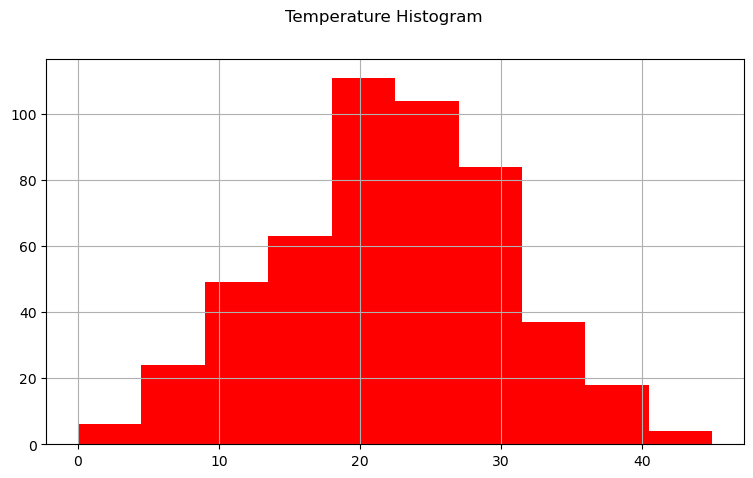

In [17]:
fig = plt.figure();
icecream_df['Temperature'].hist(bins = 10, figsize = (9, 5), color = 'r');
fig.suptitle('Temperature Histogram');

How changing the bin value in the above histogram makes a difference? Let's try it:

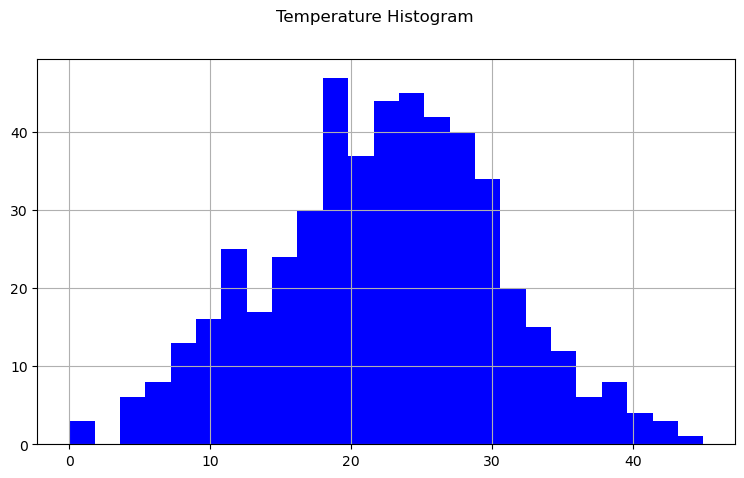

In [18]:
fig = plt.figure();
icecream_df['Temperature'].hist(bins = 25, figsize = (9, 5), color = 'b');
fig.suptitle('Temperature Histogram');

As you see not many days are like those hot days. Now it would be nice to see the correlation between temperture and revenue:

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  """Call fig.tight_layout within rect that exclude the legend."""


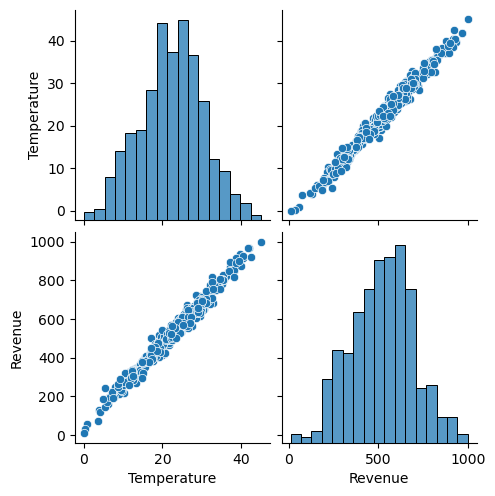

In [19]:
# plot pairplot
sns.pairplot(icecream_df);

That is expected but if we want to map those correleation to numerical values, we need to generate the correlation matrix

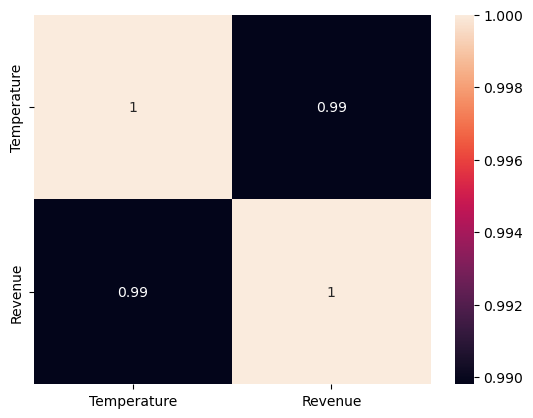

In [20]:
corr_matrix = icecream_df.corr()
sns.heatmap(corr_matrix, annot = True);
plt.show()

### PREPARE THE DATA FOR MODEL TRAINING

Before training we need to set which column(s) are X feature and which column is the label:

In [21]:
X = icecream_df[['Temperature']]
y = icecream_df[['Revenue']]

Let's check if everything is OK:

In [22]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [23]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


Let's check the shape of the inputs and outputs:

In [24]:
X.shape, y.shape

((500, 1), (500, 1))

Let's cut the temperture to two precision values

In [25]:
# Only take the numerical variables and scale them
X = round(X , 2)

In [26]:
X

,Temperature
0,24.57
1,26.01
2,27.79
3,20.60
4,11.50
...,...
495,22.27
496,32.89
497,12.59
498,22.36


Now split the data into training and testing using SkLearn Library

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


You could devide them into difference percentages like 70%-30% by changing the test_size variable.

### Train using linear regression 

We need to import the functions in Sklearn first and fit the model to the training data set.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

Let's see how this model works againts the training data set. Let's pick the first 5 Xs and 5 Ys:

In [29]:
some_x= X_train.iloc[:5]
some_y= y_train.iloc[:5]

These are the otems that have been picked:

In [30]:
some_x

,Temperature
483,27.28
193,23.59
242,27.71
356,24.47
268,35.46


In [31]:
some_y

,Revenue
483,612.241963
193,542.608070
242,618.457277
356,596.876750
268,828.296077


In [32]:
regresssion_model_sklearn.predict (some_x)

array([[630.95389995],
       [551.9538702 ],
       [640.15986548],
       [570.79398569],
       [806.08133718]])

As you see there are differences between predicted y and real y. Let's compare the closely:

In [33]:
print ("Prediction:")
regresssion_model_sklearn.predict (some_x)


Prediction:


array([[630.95389995],
       [551.9538702 ],
       [640.15986548],
       [570.79398569],
       [806.08133718]])

In [34]:
print ("Labels")
y_train.iloc[:5]

Labels


,Revenue
483,612.241963
193,542.608070
242,618.457277
356,596.876750
268,828.296077


We can ask sklearn to calculate MSE for all the X_train, but before that we need calculate prediction againts all training data set:

In [35]:
predictions = regresssion_model_sklearn.predict(X_train)

Now calculate the MSE between prediction and real y_train:

In [36]:
mse= mean_squared_error (y_train, predictions)

Now we square it to get RMSE:

In [37]:
rmse=np.sqrt(mse)

In [38]:
rmse

25.006098021466837

We can also get the model coefficent and bias values

In [39]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[21.40922216]]
Linear Model Coefficient (b):  [46.91031955]


**DIY-1**: What would be the difference between this model and another model if you do not set its fit_intercept = True?
If you do not know what that argumanet does, see this blog: https://stackoverflow.com/questions/46779605/in-the-linearregression-method-in-sklearn-what-exactly-is-the-fit-intercept-par


We did all these for Linear regression. But maybe we can get a better result if choose another algorithm. How about using **DecisionTreeReressor** algorithm!

In [40]:
from sklearn.tree import DecisionTreeRegressor
my_tree_reg = DecisionTreeRegressor()
my_tree_reg.fit (X_train, y_train)

DecisionTreeRegressor()

Now that the model is trained, let's evaulate it:

In [41]:
tree_prediction = my_tree_reg.predict (X_train)

In [42]:
rmse= np.sqrt(mean_squared_error (y_train, tree_prediction))
rmse

6.693880231376107

This is much better than Linear Regressor but that also could be becuase Tree based algorithms get overfit fast. To make sure we do not get to that overfitting scenario, we can create 10 folds in the training set, 9 for training and 1 for validation and let the sklearn train by cross validation (cv).
As you know the **mean squared error** is a common metric used to evaluate regression problems, and is calculated by taking the average of the squared differences between the predicted values and the actual values. In the following cell you see what we have scoring="neg_mean_squared_error. The reason is in sklearn, **higher score indicate better performance**. In cost/error calculation, lower number is better, so we have to negate that by **-scores**.

In [43]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score (my_tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [44]:
tree_rmse = np.sqrt(-scores)
tree_rmse

array([33.94721465, 38.68307973, 33.80649966, 24.8831039 , 33.99851838,
       32.53615194, 35.13029413, 32.966259  , 34.89503225, 35.70407705])

So in the above code, we use **"validation"** data set and **CV** to avoid overfitting. You can see each model RMSE is much different than the RMSE for just training (no validation). If you see a bit above, we have RMSE for linear regressor = 25.35 and then we had tree RMSE = 7.47. Now we have a new set of RMSEs, that as you see, we have some worse numbers than linear regressor too. 

To claculate the mean of all RMSEs and their standard deviation we use the following utility function:

In [45]:
def display_scrores (scores):
    print ("scores", scores)
    print ("Mean:", scores.mean())
    print ("Standard Deviation", scores.std())

In [46]:
display_scrores (tree_rmse)

scores [33.94721465 38.68307973 33.80649966 24.8831039  33.99851838 32.53615194
 35.13029413 32.966259   34.89503225 35.70407705]
Mean: 33.65502306875519
Standard Deviation 3.3480317812854388


**DIY-2:** As an exercise, calculate score by using RandomForestRegressor algorithm

So it seems the regression model was better. Let's continue with that.

At this point you can use X_test to calculate the quality of the model againts an unseen set of data (X_test):

In [47]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [48]:
y_predict

array([[456.04055494],
       [485.15709707],
       [354.3467497 ],
       [397.59337845],
       [386.03239849],
       [497.14626148],
       [656.21678209],
       [536.53923024],
       [439.7695461 ],
       [480.4470682 ],
       [443.19502165],
       [470.38473378],
       [586.20862564],
       [444.05139053],
       [706.9566386 ],
       [432.06222612],
       [732.00542852],
       [602.26554226],
       [656.85905876],
       [582.14087343],
       [318.80744092],
       [457.75329271],
       [310.24375206],
       [509.56361033],
       [370.1895741 ],
       [483.87254374],
       [508.06496478],
       [672.91597537],
       [332.29525088],
       [423.07035282],
       [496.71807703],
       [365.90772966],
       [898.14099245],
       [651.93493766],
       [664.99456318],
       [758.76695622],
       [506.99450367],
       [469.74245712],
       [235.09738229],
       [531.40101693],
       [292.26000545],
       [640.3739577 ],
       [584.70998009],
       [607

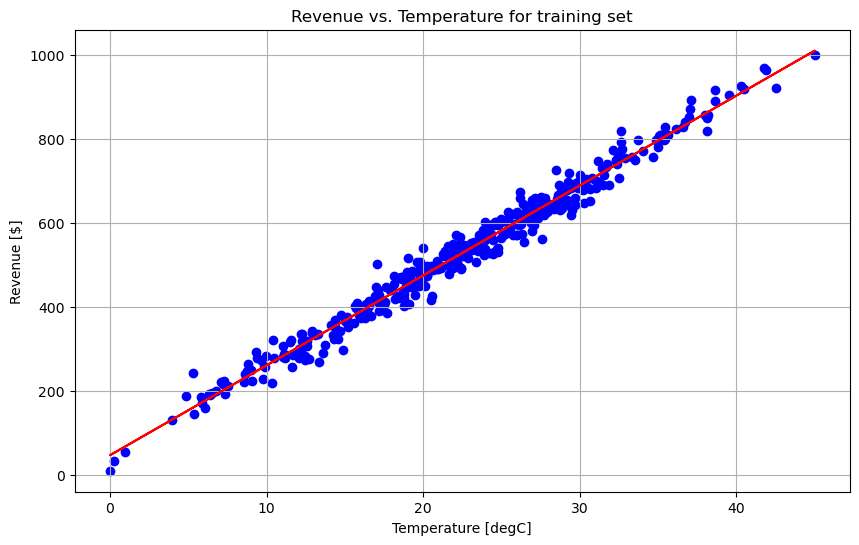

In [49]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature for training set')
plt.grid()

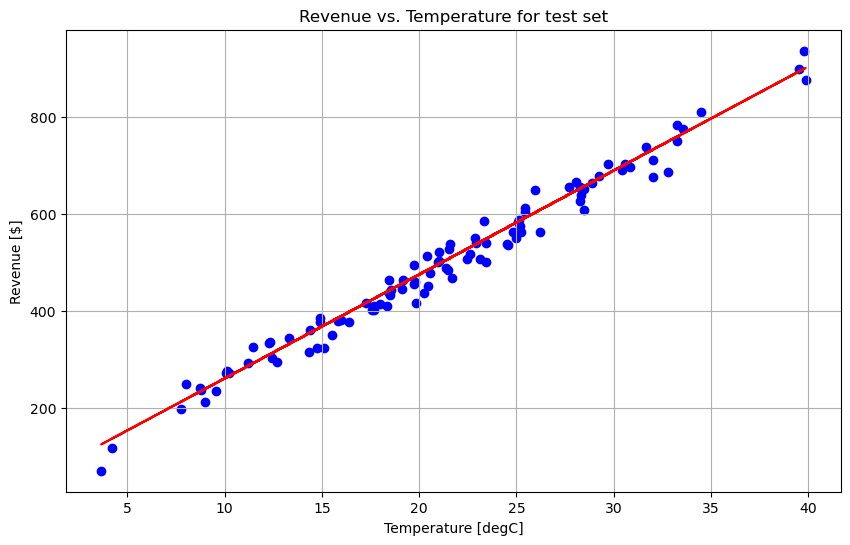

In [50]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, regresssion_model_sklearn.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature for test set')
plt.grid()